In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataframe=pd.read_csv('spam.tsv', sep='\t')


In [5]:
dataframe.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
dataframe.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
len(dataframe)

5572

In [8]:
dataframe['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## manage data

In [9]:
ham=dataframe[dataframe['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [10]:
spam=dataframe[dataframe['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [11]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [12]:
ham=ham.sample(spam.shape[0])

In [13]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [14]:
data=ham.append(spam,ignore_index=True)

data.tail()


,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


#### Exporatry data Analysis

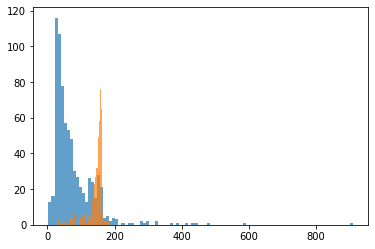

In [15]:
plt.hist(data[data['label']=='ham'] ['length'],bins = 100,alpha = 0.7)
plt.hist(data[data['label']=='spam'] ['length'],bins = 100,alpha = 0.7)
plt.show()

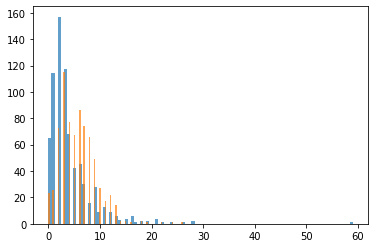

In [16]:
plt.hist(data[data['label']=='ham'] ['punct'],bins = 100,alpha = 0.7)
plt.hist(data[data['label']=='spam'] ['punct'],bins = 100,alpha = 0.7)
plt.show()

#### data preparation

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
data.head()


,label,message,length,punct
0,ham,"Sorry, was in the bathroom, sup",31,2
1,ham,Hi dis is yijue i would be happy to work wif ü...,65,3
2,ham,&lt;DECIMAL&gt; m but its not a common car he...,132,7
3,ham,"Aight, we'll head out in a few",30,2
4,ham,U can call me now...,20,3


In [29]:
X_train, X_test, y_train, y_test=train_test_split(data['message'], data['label'],test_size=0.3, random_state=0, shuffle= True,stratify=data['label'])

#### bag of word

In [23]:
vectorizer=TfidfVectorizer()

In [24]:
X_train = vectorizer.fit_transform(X_train)

In [25]:
X_train.shape

(1045, 3700)

##### Pipeline And randomForest

In [30]:
clf= Pipeline([('tfidf',TfidfVectorizer()), ('clf',RandomForestClassifier(n_estimators=100,n_jobs=-100))])

In [31]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-100))])

In [32]:
y_pred=clf.predict(X_test)

In [33]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 25, 199]], dtype=int64)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       225
        spam       0.99      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [35]:
accuracy_score(y_test,y_pred)

0.9398663697104677

In [37]:
clf.predict(["hi this is bibek"])

array(['ham'], dtype=object)

In [41]:
clf.predict(["hey you have won BMW in mobile call"])

array(['spam'], dtype=object)

##### SVM

In [61]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf', SVC(C=1000, gamma='auto'))])

In [62]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [63]:
y_pred=clf.predict(X_test)

In [64]:
confusion_matrix(y_test,y_pred)

array([[217,   8],
       [ 19, 205]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       225
        spam       0.96      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [67]:
accuracy_score(y_test,y_pred)

0.9398663697104677

In [56]:
clf.predict(["hi this is bibek"])

array(['ham'], dtype=object)

In [57]:
clf.predict(["hey you have won BMW in mobile call"])

array(['spam'], dtype=object)